<a href="https://colab.research.google.com/github/MatteoGhizzi/MLPNS2021/blob/main/LEZ13_KNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import json
import os
%pylab inline

pl.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [11]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
cd gdrive/My\ Drive/MLPNS

[Errno 2] No such file or directory: 'gdrive/My Drive/MLPNS'
/content/gdrive/My Drive/MLPNS


In [4]:
!pip install kaggle

In [13]:
!ls kaggle.json

kaggle.json


In [15]:
!chmod 600 kaggle.json

In [16]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [21]:
!kaggle datasets list -s stroke

ref                                                            title                                            size  lastUpdated          downloadCount  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  
fedesoriano/stroke-prediction-dataset                          Stroke Prediction Dataset                        67KB  2021-01-26 19:29:28          24880  
mazharkarimi/heart-disease-and-stroke-prevention               Heart Disease and Stroke Prevention               1MB  2018-05-14 10:36:48           7706  
google/tinyquickdraw                                           QuickDraw Sketches                               11GB  2018-04-18 19:38:04           3014  
valkling/tappy-keystroke-data-with-parkinsons-patients         Tappy Keystroke Data with Parkinson's Patients   96MB  2018-02-04 05:41:47           1024  
mpwolke/cusersmarildownloadsstrokecsv                          Stroke 

In [22]:
!kaggle datasets download fedesoriano/stroke-prediction-dataset

stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
!unzip stroke-prediction-dataset

Archive:  stroke-prediction-dataset.zip
replace healthcare-dataset-stroke-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: healthcare-dataset-stroke-data.csv  


In [29]:
datain = pd.read_csv('healthcare-dataset-stroke-data.csv')
datain.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
datain.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [31]:
#voglio vedere che tipo di dati ho
datain.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

i dati andranno ripuliti...

l'ID non ci interessa

bisogna stare attenti alle variabili binarie

In [32]:
dataClean = datain[['age','hypertension','avg_glucose_level','bmi']]
dataClean

,age,hypertension,avg_glucose_level,bmi
0,67.0,0,228.69,36.6
1,61.0,0,202.21,NaN
2,80.0,0,105.92,32.5
3,49.0,0,171.23,34.4
4,79.0,1,174.12,24.0
...,...,...,...,...
5105,80.0,1,83.75,NaN
5106,81.0,0,125.20,40.0
5107,35.0,0,82.99,30.6
5108,51.0,0,166.29,25.6


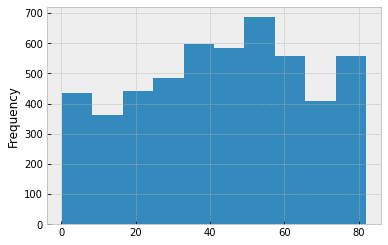

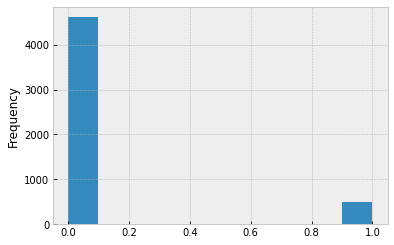

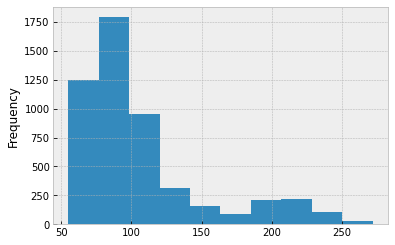

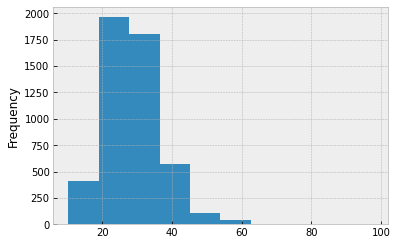

In [34]:
#vediamo come sono distribuite le nostre variabili
for s in dataClean.columns:
  pl.figure()
  dataClean[s].plot(kind='hist')

In [35]:
#correlation matrix
dataClean.corr()

,age,hypertension,avg_glucose_level,bmi
age,1.000000,0.276398,0.238171,0.333398
hypertension,0.276398,1.000000,0.174474,0.167811
avg_glucose_level,0.238171,0.174474,1.000000,0.175502
bmi,0.333398,0.167811,0.175502,1.000000


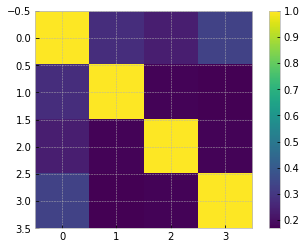

In [36]:
pl.imshow(dataClean.corr())
pl.colorbar()

In [ ]:
#il nostro modello potrebbe avere NaN
# SK_learn non funziona con NaN!!!
# possiamo rimuovere l'osservazione o la variabile 
#in questo caso conviene eliminare l'osservazione 
# ma è necessario valutare la percentuale di variabili eliminate
#tuttavia KNN può riempiere le caselle occupate da NaN